<a href="https://colab.research.google.com/github/Godpod64/ML_Personal_Learning_Project/blob/main/ML_Mod4_Ax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pytest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
pip install lazypredict

# Import the Dataset

In [ ]:
def import_local_data(file_path):
#This function needs to import the data file into collab and return a pandas dataframe
  raw_df = pd.read_excel('breast-cancer.xls')
  return raw_df

local_file_path = "/content/breast-cancer.xls"
# Dont change
raw_data = import_local_data(local_file_path)

#Exploratory Analysis

In [ ]:
raw_data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,2019-05-03 00:00:00,yes,2,left,right_up,no,recurrence-events


In [ ]:
raw_data.shape

(286, 10)

In [ ]:
unique_value_types = raw_data[['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','Class']].nunique()
print(unique_value_types)

age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
breast          2
breast-quad     6
irradiat        2
Class           2
dtype: int64


In [ ]:
unique_value_types = []
columns = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','Class']

for column in columns:
    unique_values = raw_data[column].unique().tolist()
    unique_value_types.append(unique_values)

print(unique_value_types)

[['40-49', '50-59', '60-69', '30-39', '70-79', '20-29'], ['premeno', 'ge40', 'lt40'], ['15-19', '35-39', '30-34', '25-29', '40-44', datetime.datetime(2014, 10, 1, 0, 0), '0-4', '20-24', '45-49', '50-54', datetime.datetime(2019, 9, 5, 0, 0)], ['0-2', datetime.datetime(2019, 5, 3, 0, 0), '15-17', datetime.datetime(2019, 8, 6, 0, 0), datetime.datetime(2019, 11, 9, 0, 0), '24-26', datetime.datetime(2014, 12, 1, 0, 0)], ['yes', 'no', '?'], [3, 1, 2], ['right', 'left'], ['left_up', 'central', 'left_low', 'right_up', 'right_low', '?'], ['no', 'yes'], ['recurrence-events', 'no-recurrence-events']]


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
raw_data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
raw_data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [ ]:
raw_data.duplicated().sum()

14

Analysis:

This is a relatively small dataset showing details of patients that suffered from breast cancer and reoccurance rates. All but one column ("deg-malig") contains data in object format. Looking at the number of unique values in each column, there is a number of anomolous data to address, particularly for the "tumor size" and "inv-nodes" columns, where excel has automatically converted numerous numerical values to dates because some fields are in a date format.

There are a number of missing data fields in the "breast-quad" and "node-caps", where the missing data field is annotated by a "?". The "Class" column, which in this case is our dependent variable, is complete.

There appears to also be 14 identical (duplicated) rows. Given there is a low number of unique values to each column, it's more likely than not that these do represent different patients. Normally I'd check this assumption with whoever compiled the data or perhaps a medical professional, but in these circumstances I have decidied to leave the rows in.

Overall, data pre-processing will focus on converting objects into numerical values, making assumptions to deal with anomolous data described above, such as data fields where numbers are represented as dates due to excel autocorrect formatting functions, and dealing with null values.

#Data Pre-Processing

In [ ]:
# replacing the dates in the 'tumor-size' column with their values before excel auto-converted them to dates.

dt = datetime.datetime(2014, 10, 1, 0, 0)
dlt = datetime.datetime(2019, 9, 5, 0, 0)
for i, row in enumerate(raw_data['tumor-size']):
    if row == dt:
        raw_data.loc[i, 'tumor-size'] = '10-14'
    elif row == dlt:
      raw_data.loc[i, 'tumor-size'] = '5-9'


In [ ]:
#checking it worked

unique_value_types = []
columns = ['tumor-size']

for column in columns:
    unique_values = raw_data[column].unique().tolist()
    unique_value_types.append(unique_values)

print(unique_value_types)

[['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '0-4', '20-24', '45-49', '50-54', '5-9']]


In [ ]:
# replacing the dates in the 'inv-nodes' column with their values before excel auto-converted them to dates.
unique_value_types = []
columns = ['inv-nodes']

for column in columns:
    unique_values = raw_data[column].unique().tolist()
    unique_value_types.append(unique_values)

print(unique_value_types)

[['0-2', datetime.datetime(2019, 5, 3, 0, 0), '15-17', datetime.datetime(2019, 8, 6, 0, 0), datetime.datetime(2019, 11, 9, 0, 0), '24-26', datetime.datetime(2014, 12, 1, 0, 0)]]


In [ ]:
dt_2 = datetime.datetime(2019, 5, 3, 0, 0)
dt_3 = datetime.datetime(2019, 8, 6, 0, 0)
dt_4 = datetime.datetime(2019, 11, 9, 0, 0)
dt_5 = datetime.datetime(2014, 12, 1, 0, 0)
for i, row in enumerate(raw_data['inv-nodes']):
    if row == dt_2:
        raw_data.loc[i, 'inv-nodes'] = '3-5'
    elif row == dt_3:
      raw_data.loc[i, 'inv-nodes'] = '6-8'
    elif row == dt_4:
      raw_data.loc[i, 'inv-nodes'] = '9-11'
    elif row == dt_5:
      raw_data.loc[i, 'inv-nodes'] = '1-12'

In [ ]:
#checking it worked

unique_value_types = []
columns = ['inv-nodes']

for column in columns:
    unique_values = raw_data[column].unique().tolist()
    unique_value_types.append(unique_values)

print(unique_value_types)

[['0-2', '3-5', '15-17', '6-8', '9-11', '24-26', '1-12']]


In [ ]:
# dropping rows with missing data. Note - using simpleimputer was considered, however the sklearn simple imputer does not deal well with categorical variables and is mainly used for numerical variables. Given there are only 9 rows with missing data, I took the decision that this would not overly affect the performance of the model.

raw_data.replace("?", np.nan, inplace=True)
raw_data = raw_data.dropna()

In [ ]:
#checking it worked
unique_value_types = []
columns = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','Class']

for column in columns:
    unique_values = raw_data[column].unique().tolist()
    unique_value_types.append(unique_values)

print(unique_value_types)

[['40-49', '50-59', '60-69', '30-39', '70-79', '20-29'], ['premeno', 'ge40', 'lt40'], ['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '0-4', '20-24', '45-49', '50-54', '5-9'], ['0-2', '3-5', '15-17', '6-8', '9-11', '24-26', '1-12'], ['yes', 'no'], [3, 1, 2], ['right', 'left'], ['left_up', 'central', 'left_low', 'right_up', 'right_low'], ['no', 'yes'], ['recurrence-events', 'no-recurrence-events']]


In [ ]:
# Moving numerical features to earlier indexes to make the indexes easier to track for feature scaling, which will occur after OneHotEncoding.

neworder = ['deg-malig','age','menopause','tumor-size','inv-nodes','node-caps', 'breast','breast-quad','irradiat','Class']
raw_data=raw_data.reindex(columns=neworder)

In [ ]:
# Having another look at the data following a sufficient level of pre-processing to assess how balanced it is. This will guide me on which accuracy scores to bias and therefore which models will likely be more effective.
class_ratios = raw_data.value_counts(normalize=True)

print("Class Ratios:")
print(class_ratios)

Class Ratios:
deg-malig  age    menopause  tumor-size  inv-nodes  node-caps  breast  breast-quad  irradiat  Class               
1          60-69  ge40       10-14       0-2        no         left    left_up      no        no-recurrence-events    0.00722
2          40-49  premeno    20-24       0-2        no         right   left_up      no        no-recurrence-events    0.00722
           60-69  ge40       15-19       0-2        no         right   left_up      no        no-recurrence-events    0.00722
1          30-39  premeno    15-19       0-2        no         left    left_low     no        no-recurrence-events    0.00722
3          30-39  premeno    35-39       0-2        no         left    left_low     no        recurrence-events       0.00722
                                                                                                                       ...   
2          40-49  premeno    20-24       0-2        no         left    left_up      no        no-recurrence-events 

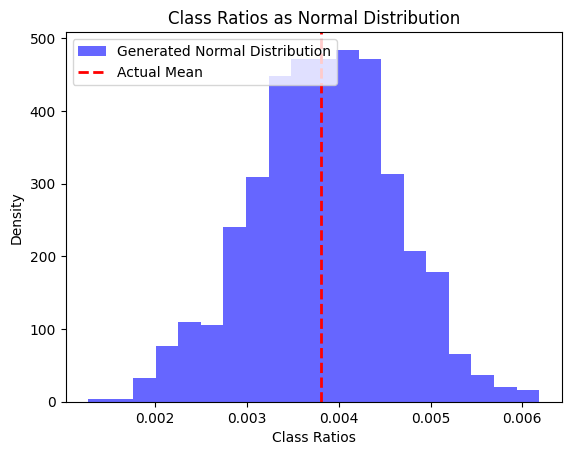

In [ ]:
# Generate a normal distribution based on class ratios
import matplotlib.pyplot as plt
mean = class_ratios.mean()
std_dev = class_ratios.std()
num_samples = 1000

samples = np.random.normal(mean, std_dev, num_samples)

# Plot the normal distribution
plt.hist(samples, bins=20, density=True, alpha=0.6, color='b', label='Generated Normal Distribution')
plt.axvline(x=mean, color='r', linestyle='dashed', linewidth=2, label='Actual Mean')
plt.xlabel('Class Ratios')
plt.ylabel('Density')
plt.title('Class Ratios as Normal Distribution')
plt.legend()
plt.show()

Note - Normal distribution appears even and most values converge around the mean, showing a reasonably well balanced dataset. Therefore, I will favour a normal accuracy score, as opposed to an F1 score or balanced accuracy.

In [ ]:
# Converting dataset from pds to np before split.

X = raw_data.iloc[:, :-1].values
y = raw_data.iloc[:, -1].values

In [ ]:
# Here, I am separating the categorical and numerical variables to enable the use of OneHotEncoding (the 'passthrough' parameter would not overlook the numerical data during pre-processing, so this is a workaround)
Z = X[:,0]
X = X[:, 1:]

In [ ]:
#OneHotEncoding the categorical variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

All_columns = [0, 1, 2, 3, 4, 5, 6, 7]

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), All_columns)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Insert the numerical column back into the array
X = np.concatenate((Z.reshape(-1, 1), X), axis=1)

In [ ]:
# Encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Splitting the dataset into the training set and the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

#Model Testing

In [ ]:
class Module4_Model:

    def __init__(self):
        self.model = None

    def preprocess_training_data(self, training_df):

        if training_df is X_train:
          #Feature scaling numerical variables
          X_train_num = X_train[:, 0].reshape(-1, 1)
          X_train_num = sc.fit_transform(X_train_num)
          #Replace the original numerical column with the scaled column
          X_train[:, 0] = X_train_num.flatten()
          processed_df = X_train

        return processed_df

    def preprocess_test_data(self, test_df):

        if test_df is X_test:
          # Feature scaling numerical variables
          X_test_num = test_df[:, 0].reshape(-1, 1)
          X_test_num = sc.transform(X_test_num)
          # Replace the original numerical column with the scaled column
          test_df[:, 0] = X_test_num.flatten()
          processed_df = test_df

        return processed_df

In [ ]:
# Dont change
my_model = Module4_Model()
# Dont change
X_train_processed = my_model.preprocess_training_data(X_train)

In [ ]:
# Create a model
from sklearn.svm import NuSVC
# Dont change
X_test_processed = my_model.preprocess_test_data(X_test)

# Train your model
classifier = NuSVC(nu=0.1, kernel='rbf',gamma=0.1, random_state=42)
classifier.fit(X_train_processed, y_train)


NuSVC(gamma=0.1, nu=0.1, random_state=42)

In [ ]:
# use your model to make a prediction on unseen data
y_pred = classifier.predict(X_test_processed)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [ ]:
# Assess the accuracy of your model and explain your key findings
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29  7]
 [13  7]]


0.6428571428571429

In [ ]:
#Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test_processed, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 49.00 %
Standard Deviation: 16.06 %


In [ ]:
#Applying Gridsearch to test best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'nu': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'nu': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train_processed, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 77.39 %
Best Parameters: {'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.5}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 252, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 331, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 191

Key Findings



I used the lazyclassifier as a starting point to select ML models to trial. NuSVC and SVC performed significantly better than other models, so I trialed both, as well as RandomForestClassifier, just to test against my decision to use the lazyclassifier as a starting point.

NuSVC indeed performed better than the others - with an initial accuracy score of 0.66. This can be improved through K-fold cross-validation as shown when applied to the training set, however the outcome of gridsearch (tuning model to include gamma=0.1) reduced the accuracy of the model by just over 10%. Indeed the accuracy of the model reduced when applied tot he test data. This indicates a degree of overfitting.

Given that the dataset appears balanced, this would appear to be repeatable and reliable. However, there are relatively few data entries - this is not a big dataset, so the model's accuracy must always be questioned and this is likely the main cause of overfitting. This could potentially be reduced by reducing the number of dimensions, but this is also likely to yield little since the dataset is already quite small, and a key requirement for such an important model to be used in practice is explainability. Creating unrecognisable features through PCA/LDA may improve accuracy, albeit small, but reduces explainability.      

Given what the model is trying to achieve, predicting reoccurrence of breast cancer, the overall accuracy score may not be acceptable. Thirteen Type two errors for example (albeit before tuning), would likely yield the model as not sufficiently accurate so as to be wholly relied upon. This would make sense, since the task of predicting reoccurrence of breast cancer is clearly very difficult and there are likely to be other variables not captured in the dataframe (e.g. family history). The model's utility therefore would be to assist in prioritising which subjects should be tested for reoccurrence first.  With the main issue being overfitting, the
models performance is likely to improve with more data (as is the case with most ML models!).


In [ ]:
#Unit tests:
#Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """

    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))

    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0
# run null data unit test on both training and test data
test_no_nulls(X_train_processed)
test_no_nulls(X_test_processed)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models,pred = clf.fit(X_train_processed, X_test_processed, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  7.51it/s]

[LightGBM] [Info] Number of positive: 61, number of negative: 160
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 221, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276018 -> initscore=-0.964300
[LightGBM] [Info] Start training from score -0.964300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.71,0.67,0.67,0.71,0.08
NuSVC,0.75,0.66,0.66,0.71,0.04
SVC,0.73,0.64,0.64,0.69,0.05
Perceptron,0.62,0.63,0.63,0.63,0.03
LinearDiscriminantAnalysis,0.68,0.62,0.62,0.66,0.07
LinearSVC,0.68,0.62,0.62,0.66,0.09
CategoricalNB,0.66,0.61,0.61,0.65,0.04
BernoulliNB,0.66,0.61,0.61,0.65,0.04
LGBMClassifier,0.68,0.59,0.59,0.64,0.14
